# Pymaceuticals Inc.
---

### Analysis
* Capomulin and Ramicane seem comparable, both of which are more effective than Infubinol and Ceftamine (see box plot of the final tumor volumes)
* The drugs are less effective the more the mouse weighs according to the strong strong positive correlation of 0.84 (see scatter plot) 
* Some drugs had potential outliers identified - Infubinol has a outlier tumor volume of 36.32 mm3.
* The gender of mice was evenly spread out, with 51% of mice being male and 49% being female (see pie charts)

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how='right')

# Display the data table for preview
combined_data = combined_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

combined_data.sample(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
564,x822,10,48.983717,1,Ceftamin,Male,3,29
1455,k382,30,63.469442,4,Ketapril,Male,22,29
590,l725,10,50.823912,2,Naftisol,Female,8,26
1243,r554,25,33.893345,3,Capomulin,Female,8,17
259,c458,5,45.722279,0,Ramicane,Female,23,20


In [2]:
# Checking the number of mice.
mice=combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [7]:
clean_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_tumor_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
drug_tumor_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drug_tumor_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drug_tumor_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
drug_tumor_sems = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
drug_regimen = clean_df['Drug Regimen'].unique()

Summary_Statistics = {
    "Mean Tumor Volume (mm3)": drug_tumor_mean,
    "Median Tumor Volume (mm3)": drug_tumor_median,
    "Tumor Volume Variance (mm3)": drug_tumor_var,
    "Tumor Volume Std. Dev. (mm3)": drug_tumor_std,
    "Tumor Volume Std. Err. (mm3)": drug_tumor_sems
}

# Display the DataFrame of summary statistics
summary_stats = pd.DataFrame(Summary_Statistics)

summary_stats

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance (mm3),Tumor Volume Std. Dev. (mm3),Tumor Volume Std. Err. (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count = clean_df["Drug Regimen"].value_counts()
drug_regimen_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

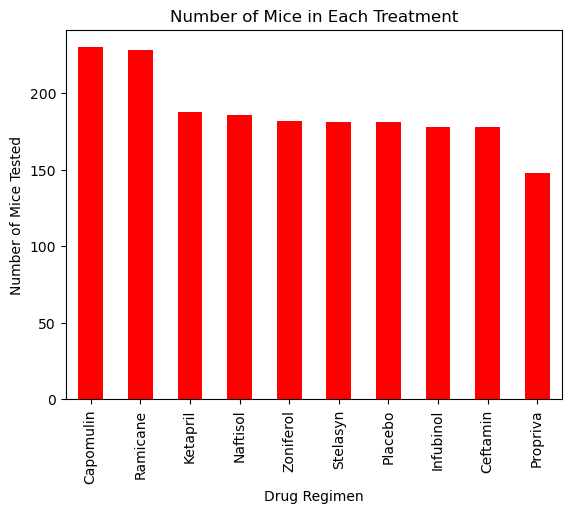

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# # Create a Pandas bar plot based off of the series group from above
pandas_plot = drug_regimen_count.plot.bar(color='red')

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice in Each Treatment")

plt.show()

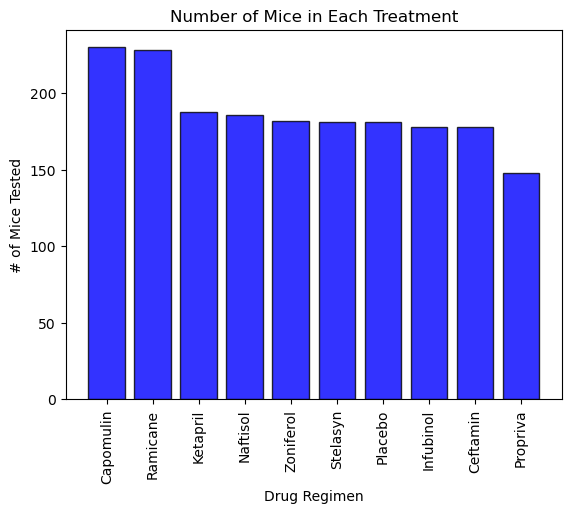

In [12]:
# # Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = drug_regimen_count.index.values
y_axis = drug_regimen_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='blue',  align='center',alpha=0.8,edgecolor='black')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice in Each Treatment")

plt.show()

In [13]:
# Get count for the Sex group (male or female)
gender_distribution = clean_df['Sex'].value_counts()

gender_distribution

Sex
Male      958
Female    922
Name: count, dtype: int64

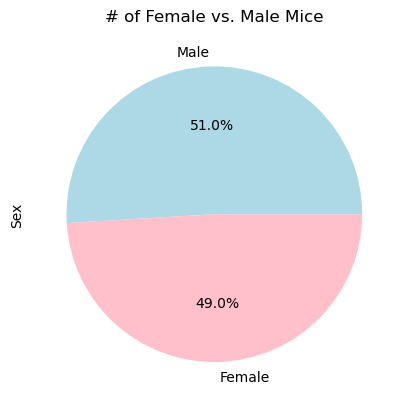

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])

plt.title('# of Female vs. Male Mice')
plt.ylabel('Sex')

plt.show()

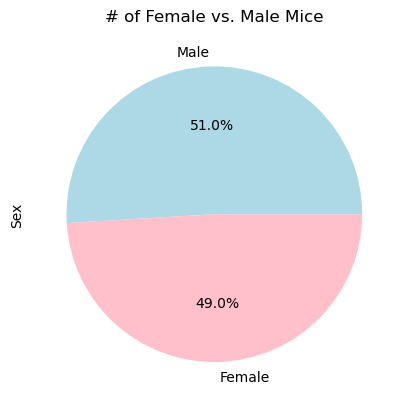

In [15]:
# Create a figure and axis
figure , axis = plt.subplots()

# Plot the pie chart using Matplotlib
axis.pie(gender_distribution, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'pink'])

axis.set_title('# of Female vs. Male Mice')
axis.set_ylabel('Sex')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
by_mouse = combined_data.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']]. \
    merge(combined_data,on=['Mouse ID','Timepoint'],how="left")

# Function to get outliers
def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']

    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen} potential outliers:{outliers}")
    return regimen_data

capo = get_outliers("Capomulin")
ceft = get_outliers("Ceftamin")
infu = get_outliers("Infubinol")
rami = get_outliers("Ramicane")

Capomulin potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
drug_types = ["Ceftamin","Capomulin","Infubinol","Ramicane"]
drugs = combined_data[combined_data["Drug Regimen"].isin(drug_types)]
drugs.sample(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1874,r811,45,37.225650,1,Ramicane,Male,9,19
506,k804,10,49.471244,0,Infubinol,Female,23,29
1665,a275,40,60.921539,3,Ceftamin,Female,20,28
1622,a644,40,35.779451,0,Ramicane,Female,7,17
58,c458,0,45.000000,0,Ramicane,Female,23,20


In [18]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe -- Use stack/unstack!!!
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)

# loop thrugh list
treatment = 0
for drug in drug_types:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lower_quart = quartiles[0.25].round(2)
    upper_quart = quartiles[0.75].round(2)
    IQR = round(upper_quart-lower_quart,2)
    lower_bound = round(lower_quart - (1.5*IQR),2)
    upper_bound = round(upper_quart + (1.5*IQR),2)


    if treatment == 0:
        print(f"*****----------*****----------*****----------")
    print(f"The lower quartile of {drug} treatments is: {lower_quart}")
    print(f"The upper quartile of {drug} treatments is: {upper_quart}")
    print(f"The inter quartile range of {drug} treatments is: {IQR}")
    print(f"Values below {lower_bound} might be {drug} outliers.")
    print(f"Values above {upper_bound} might be {drug} outliers.")
    print(f"*****----------*****----------*****----------")
    treatment+=1

*****----------*****----------*****----------
The lower quartile of Ceftamin treatments is: 48.72
The upper quartile of Ceftamin treatments is: 64.3
The inter quartile range of Ceftamin treatments is: 15.58
Values below 25.35 might be Ceftamin outliers.
Values above 87.67 might be Ceftamin outliers.
*****----------*****----------*****----------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The inter quartile range of Capomulin treatments is: 7.78
Values below 20.71 might be Capomulin outliers.
Values above 51.83 might be Capomulin outliers.
*****----------*****----------*****----------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The inter quartile range of Infubinol treatments is: 11.48
Values below 36.83 might be Infubinol outliers.
Values above 82.75 might be Infubinol outliers.
*****----------*****----------*****----------
The lower quartile of Ramicane treatment

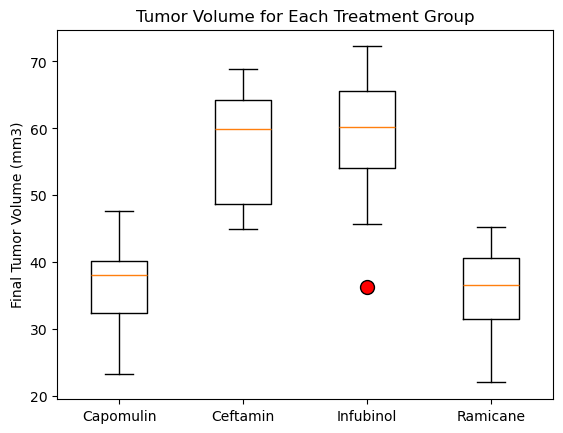

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([capo, ceft, infu, rami],labels=['Capomulin','Ceftamin','Infubinol','Ramicane'],flierprops= red_dot)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume for Each Treatment Group')


plt.show()


## Line and Scatter Plots

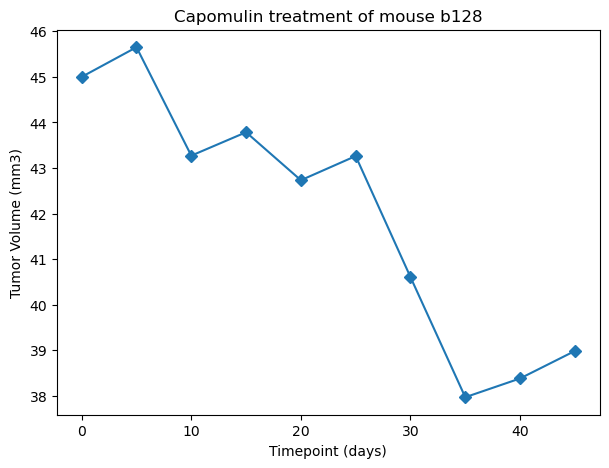

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Find Capomulin mouse
capomulin_mice = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
selected_capomulin_mouse = capomulin_mice['Mouse ID'].unique()[0] 

#Extract data for above mouse
selected_capomulin_mouse_data = capomulin_mice[capomulin_mice['Mouse ID'] == selected_capomulin_mouse]

# Generate a Line Plot
plt.figure(figsize=(7, 5))
plt.plot(selected_capomulin_mouse_data['Timepoint'], selected_capomulin_mouse_data['Tumor Volume (mm3)'],marker='D')
plt.title(f"Capomulin treatment of mouse {selected_capomulin_mouse}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

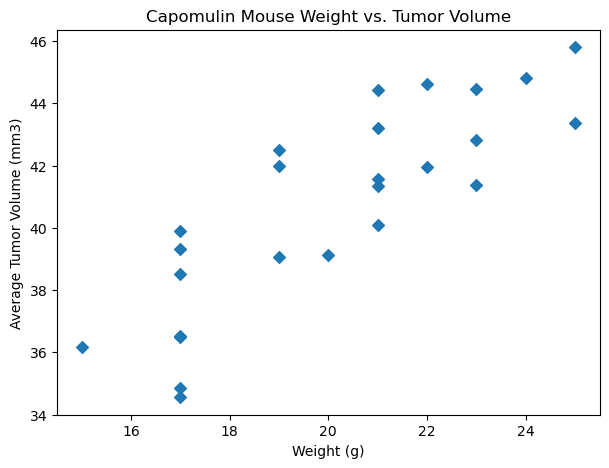

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Find average tumor volume
capomulin_avg_tumor_vol = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Extract Unique Mouse Weights
mouse_weight = capomulin_mice.groupby('Mouse ID')['Weight (g)'].agg('unique').str[0]

# Generate a Scatter Plot
plt.figure(figsize=(7, 5))
plt.scatter(mouse_weight, capomulin_avg_tumor_vol, marker='D')
plt.title("Capomulin Mouse Weight vs. Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [22]:
capomulin_mice.sample(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
242,g288,0,45.000000,0,Capomulin,Male,3,19
1269,m957,25,37.695432,1,Capomulin,Female,3,19
982,l509,20,48.070452,2,Capomulin,Male,17,21
1392,g288,30,42.874461,1,Capomulin,Male,3,19
230,x401,0,45.000000,0,Capomulin,Female,16,15
1414,l509,30,44.708055,2,Capomulin,Male,17,21
862,u364,15,47.212200,2,Capomulin,Male,18,17
432,r944,5,45.737145,0,Capomulin,Male,12,25
930,f966,20,30.485985,0,Capomulin,Male,16,17
0,b128,0,45.000000,0,Capomulin,Female,9,22


In [23]:
# Find Capomulin average
mouse_weight.corr(capomulin_avg_tumor_vol)

0.8419363424694722

The correlation between mouse weight and the average tumor volume is 0.84


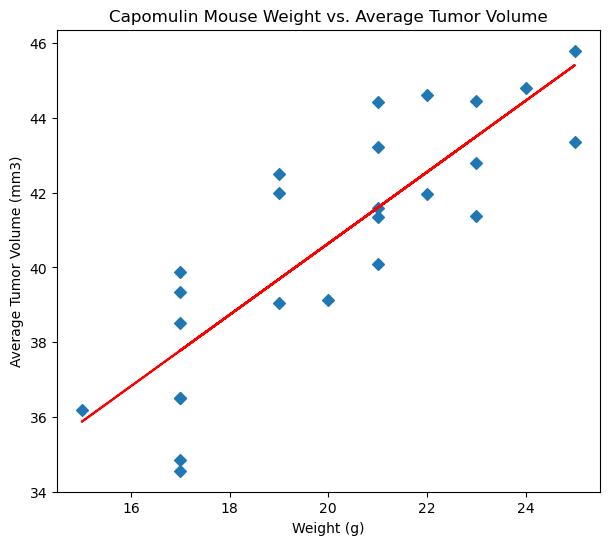

In [24]:
# Calculate Correlation Coefficient
correlation, _ = st.pearsonr(mouse_weight, capomulin_avg_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation,2)}")

# Perform Linear Regression
slope, intercept, r_value, pvalue, stderr = st.linregress(mouse_weight, capomulin_avg_tumor_vol)

# Crate Scatter Plot with Linear Regression Line
plt.figure(figsize=(7, 6))
plt.scatter(mouse_weight, capomulin_avg_tumor_vol,marker='D')
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='r')

plt.title("Capomulin Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()